## Loading the Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r"C:\Users\apsay\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Understanding the Data

In [4]:
df.head() #Printing first few rows of the dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info() #Display concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe() #Display descriptive statistics of the dataframe

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df.dtypes #Display the data types of each column

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.nunique() #Unique values in each column

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
df.duplicated().sum() #Checking for duplicates

5268

In [10]:
df.isnull().sum() #Checking for missing values in the dataset

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

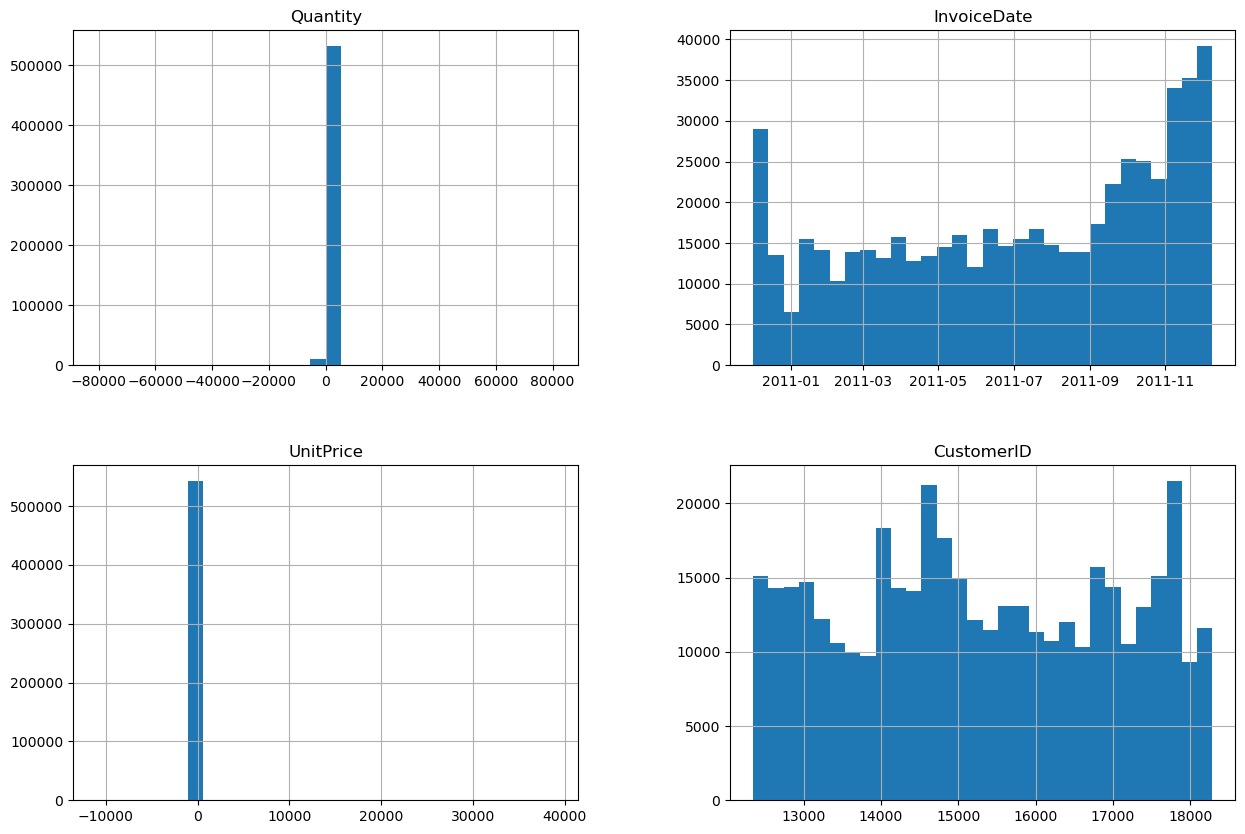

In [11]:
df.hist(bins=30, figsize=(15, 10))
plt.show()
#Visualise data distributions

## Cleaning the Data

In [12]:
df.dropna(axis=0, inplace=True) #Handling missing values by dropping rows with missing values

In [13]:
df.dropna(axis=1, inplace=True) #Handling missing values by dropping columns with missing values

In [14]:
df.shape #Dimensions of the DataFrame after dropping NaN values

(406829, 8)

In [15]:
df.drop_duplicates(inplace=True) #Removing dupicate entries in the dataset


In [16]:
df.duplicated().sum()

0

In [17]:
df['CustomerID'] = df['CustomerID'].astype(int) #Convert CustomerID from float to int


In [18]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

## Transforming the Data

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID']  
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display standardized dataframe
df_standardized.head()

# Min-Max Scaling(Normalization)
scaler = MinMaxScaler()
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID']  
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display normalized dataframe
df_normalized.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.500037,2010-12-01 08:26:00,0.000065,0.926443,United Kingdom
1,536365,71053,WHITE METAL LANTERN,0.500037,2010-12-01 08:26:00,0.000087,0.926443,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.500049,2010-12-01 08:26:00,0.000071,0.926443,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.500037,2010-12-01 08:26:00,0.000087,0.926443,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.500037,2010-12-01 08:26:00,0.000087,0.926443,United Kingdom


In [20]:
df_encoded = pd.get_dummies(df_normalized, columns=['Country', 'Description', 'StockCode'], drop_first=True)
df_encoded.head() #Encoding categorical variables


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,StockCode_90214Y,StockCode_90214Z,StockCode_BANK CHARGES,StockCode_C2,StockCode_CRUK,StockCode_D,StockCode_DOT,StockCode_M,StockCode_PADS,StockCode_POST
0,536365,0.500037,2010-12-01 08:26:00,0.000065,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,536365,0.500049,2010-12-01 08:26:00,0.000071,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Engineering

In [21]:
df_fe = df_encoded.copy()
#Creating new features based on existing ones
# Create a feature for total sales
df_fe['TotalSales'] = df_fe['Quantity'] * df_fe['UnitPrice']

# Create a feature for the day of the week(Monday = 0, Sunday = 6).
df_fe['DayOfWeek'] = df_fe['InvoiceDate'].dt.dayofweek

# Create a feature for the hour of the day
df_fe['HourOfDay'] = df_fe['InvoiceDate'].dt.hour

df_fe.head()


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,StockCode_C2,StockCode_CRUK,StockCode_D,StockCode_DOT,StockCode_M,StockCode_PADS,StockCode_POST,TotalSales,DayOfWeek,HourOfDay
0,536365,0.500037,2010-12-01 08:26:00,0.000065,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000033,2,8
1,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000043,2,8
2,536365,0.500049,2010-12-01 08:26:00,0.000071,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000035,2,8
3,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000043,2,8
4,536365,0.500037,2010-12-01 08:26:00,0.000087,0.926443,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000043,2,8


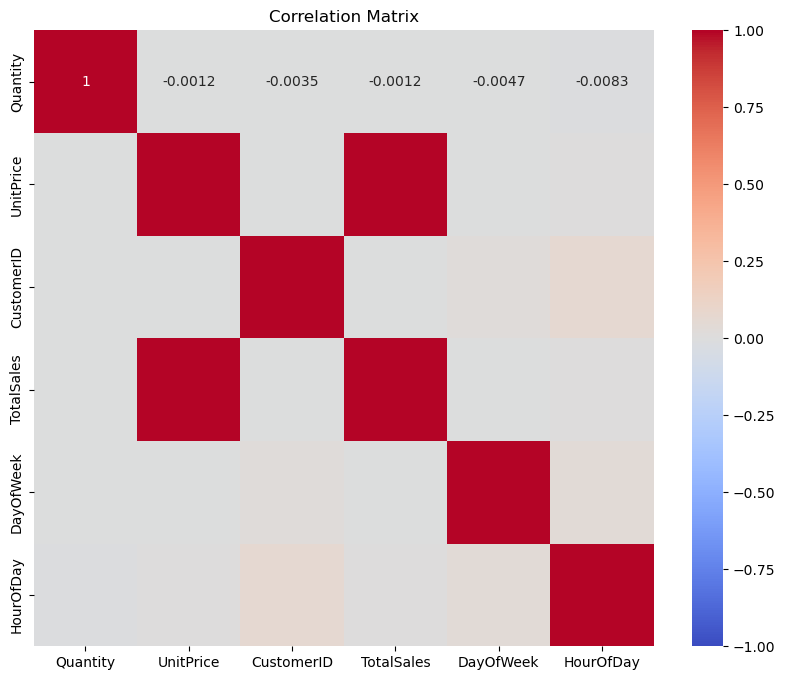

In [24]:
# Calculate correlation matrix
correlation_matrix = df_fe[['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales', 'DayOfWeek', 'HourOfDay']].corr()
# Visualize using a heatmap to identify highly correlated features

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
